---
title: "4. Predictive Modelling"
format: 
  html:
    toc: false
    page-layout: full
execute:
    echo: true
    warning: false
---

## 1. Getting the data with API

In [1]:
#| echo: false
#| code-fold: true
#| include: false

!pip install cenpy
import cenpy
import numpy as np
np.random.seed(42)

### **1.1 ACS 5-Year Estimate by US States**
1. Median Household Income
2. Education Levels
3. Unemployment rate
4. Labour force participation rate
5. Population
6. Poverty rate

In [2]:
#| echo: false
#| code-fold: true
#| include: false

# Finding data set
available = cenpy.explorer.available()
available

# We use data from ACS 5 Year, Monthly Export and Import

,c_isTimeseries,temporal,spatial,c_isAggregate,publisher,references,programCode,modified,license,keyword,...,description,bureauCode,accessLevel,title,c_isAvailable,c_isCube,c_isMicrodata,c_documentationLink,c_dataset,vintage
ABSCB2017,NaN,2017/2017,United States,True,U.S. Census Bureau,https://www.census.gov/developers/,006:007,2020-04-30 00:00:00.0,https://creativecommons.org/publicdomain/zero/...,"(census,)",...,The Annual Business Survey (ABS) provides info...,006:07,public,Annual Business Survey: Characteristics of Bus...,True,NaN,NaN,https://www.census.gov/developer/,"(abscb,)",2017.0
ABSCB2018,NaN,2018/2018,United States,True,U.S. Census Bureau,https://www.census.gov/developers/,006:007,2020-10-26 00:00:00.0,https://creativecommons.org/publicdomain/zero/...,"(census,)",...,The Annual Business Survey (ABS) provides info...,006:07,public,Annual Business Survey: Characteristics of Bus...,True,NaN,NaN,https://www.census.gov/developer/,"(abscb,)",2018.0
ABSCB2019,NaN,2019/2019,US,True,U.S. Census Bureau,https://www.census.gov/developers/,006:007,2021-08-17 00:00:00.0,https://creativecommons.org/publicdomain/zero/...,"(census,)",...,The Annual Business Survey (ABS) provides info...,006:07,public,2019 Annual Business Survey: Characteristics o...,True,NaN,NaN,https://www.census.gov/developer/,"(abscb,)",2019.0
ABSCB2020,NaN,2020/2020,US,True,U.S. Census Bureau,https://www.census.gov/developers/,006:007,2022-08-03 00:00:00.0,https://creativecommons.org/publicdomain/zero/...,"(census,)",...,The Annual Business Survey (ABS) provides info...,006:07,public,2020 Annual Business Survey: Characteristics o...,True,NaN,NaN,https://www.census.gov/developer/,"(abscb,)",2020.0
ABSCB2021,NaN,2021/2021,United States,True,U.S. Census Bureau,https://www.census.gov/developers/,006:007,2023-07-24 10:30:52.0,https://creativecommons.org/publicdomain/zero/...,"(census,)",...,The Annual Business Survey (ABS) provides info...,006:07,public,2021 Annual Business Survey: Characteristics o...,True,NaN,NaN,https://www.census.gov/developer/,"(abscb,)",2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ftd16ImpExpHist,NaN,2016/2016,United States,True,U.S. Census Bureau,http://www.census.gov/developers/,000:000,2017-07-13,http://creativecommons.org/publicdomain/zero/1.0/,"(census,)",...,This international trade file provides the ann...,006:07,public,2016 International Trade: Historical Imports a...,True,True,NaN,http://www.census.gov/developer/,"(intltrade, imp_exp)",2016.0
ftd17ImpExpHist,NaN,2017/2017,United States,True,U.S. Census Bureau,http://www.census.gov/developers/,000:000,2018-03-13,http://creativecommons.org/publicdomain/zero/1.0/,"(census,)",...,This international trade file provides the ann...,006:07,public,2017 International Trade: Historical Imports a...,True,True,NaN,http://www.census.gov/developer/,"(intltrade, imp_exp)",2017.0
ftd18ImpExpHist,NaN,2018/2018,United States,True,U.S. Census Bureau,http://www.census.gov/developers/,000:000,2019-03-13,http://creativecommons.org/publicdomain/zero/1.0/,"(census,)",...,This international trade file provides the ann...,006:07,public,2018 International Trade: Historical Imports a...,True,True,NaN,http://www.census.gov/developer/,"(intltrade, imp_exp)",2018.0
ftdImpExpHist,NaN,2014/2014,United States,True,U.S. Census Bureau,http://www.census.gov/developers/,000:000,2015-07-20,http://creativecommons.org/publicdomain/zero/1.0/,"(census,)",...,This international trade file provides the ann...,006:07,public,2014 International Trade: Historical Imports a...,True,True,NaN,http://www.census.gov/developer/,"(intltrade, imp_exp)",2014.0


In [3]:
#| echo: false
#| code-fold: true
#| include: false

acs = available.filter(regex="^ACS", axis=0)
available.filter(regex="^ACSDT5Y", axis=0)

,c_isTimeseries,temporal,spatial,c_isAggregate,publisher,references,programCode,modified,license,keyword,...,description,bureauCode,accessLevel,title,c_isAvailable,c_isCube,c_isMicrodata,c_documentationLink,c_dataset,vintage
ACSDT5Y2009,NaN,NaN,NaN,True,U.S. Census Bureau,https://www.census.gov/developers/,006:004,2019-08-27 13:11:18.0,https://creativecommons.org/publicdomain/zero/...,"(census,)",...,The American Community Survey (ACS) is an ongo...,006:07,public,American Community Survey: 5-Year Estimates: D...,True,True,NaN,https://www.census.gov/developer/,"(acs, acs5)",2009.0
ACSDT5Y2010,NaN,NaN,United States,True,U.S. Census Bureau,https://www.census.gov/developers/,006:004,2018-07-04 00:00:00.0,https://creativecommons.org/publicdomain/zero/...,"(census,)",...,The American Community Survey (ACS) is an ongo...,006:07,public,ACS 5-Year Detailed Tables,True,True,NaN,https://www.census.gov/developer/,"(acs, acs5)",2010.0
ACSDT5Y2011,NaN,NaN,NaN,True,U.S. Census Bureau,https://www.census.gov/developers/,006:004,2018-07-04 00:00:00.0,https://creativecommons.org/publicdomain/zero/...,"(census,)",...,The American Community Survey (ACS) is an ongo...,006:07,public,ACS 5-Year Detailed Tables,True,True,NaN,https://www.census.gov/developer/,"(acs, acs5)",2011.0
ACSDT5Y2012,NaN,NaN,NaN,True,U.S. Census Bureau,https://www.census.gov/developers/,006:004,2018-07-04 00:00:00.0,https://creativecommons.org/publicdomain/zero/...,"(census,)",...,The American Community Survey (ACS) is an ongo...,006:07,public,ACS 5-Year Detailed Tables,True,True,NaN,https://www.census.gov/developer/,"(acs, acs5)",2012.0
ACSDT5Y2013,NaN,NaN,NaN,True,U.S. Census Bureau,https://www.census.gov/developers/,006:004,2018-07-04 00:00:00.0,https://creativecommons.org/publicdomain/zero/...,"(census,)",...,The American Community Survey (ACS) is an ongo...,006:07,public,ACS 5-Year Detailed Tables,True,True,NaN,https://www.census.gov/developer/,"(acs, acs5)",2013.0
ACSDT5Y2014,NaN,NaN,NaN,True,U.S. Census Bureau,https://www.census.gov/developers/,006:004,2018-07-04 00:00:00.0,https://creativecommons.org/publicdomain/zero/...,"(census,)",...,The American Community Survey (ACS) is an ongo...,006:07,public,ACS 5-Year Detailed Tables,True,True,NaN,https://www.census.gov/developer/,"(acs, acs5)",2014.0
ACSDT5Y2015,NaN,NaN,NaN,True,U.S. Census Bureau,https://www.census.gov/developers/,006:004,2018-07-05 00:00:00.0,https://creativecommons.org/publicdomain/zero/...,"(census,)",...,The American Community Survey (ACS) is an ongo...,006:07,public,ACS 5-Year Detailed Tables,True,True,NaN,https://www.census.gov/developer/,"(acs, acs5)",2015.0
ACSDT5Y2016,NaN,NaN,NaN,True,U.S. Census Bureau,https://www.census.gov/developers/,006:004,2018-07-05 00:00:00.0,https://creativecommons.org/publicdomain/zero/...,"(census,)",...,The American Community Survey (ACS) is an ongo...,006:07,public,ACS 5-Year Detailed Tables,True,True,NaN,https://www.census.gov/developer/,"(acs, acs5)",2016.0
ACSDT5Y2017,NaN,NaN,NaN,True,U.S. Census Bureau,https://www.census.gov/developers/,006:004,2018-08-21 07:11:43.0,https://creativecommons.org/publicdomain/zero/...,"(census,)",...,The American Community Survey (ACS) is an ongo...,006:07,public,ACS 5-Year Detailed Tables,True,True,NaN,https://www.census.gov/developer/,"(acs, acs5)",2017.0
ACSDT5Y2018,NaN,NaN,NaN,True,U.S. Census Bureau,https://www.census.gov/developers/,006:004,2019-10-22 16:28:02.0,https://creativecommons.org/publicdomain/zero/...,"(census,)",...,The American Community Survey (ACS) is an ongo...,006:07,public,American Community Survey: 5-Year Estimates: D...,True,True,NaN,https://www.census.gov/developer/,"(acs, acs5)",2018.0


In [4]:
#| echo: false
#| code-fold: true
#| include: false

cenpy.explorer.explain("ACSDT5Y2023")
acs = cenpy.remote.APIConnection('ACSDT5Y2023')

In [5]:
#| echo: false
#| code-fold: true
#| include: false

acs.varslike(
    pattern="B19019_001E",
    by="attributes",
).sort_index()

,label,concept,predicateType,group,limit,predicateOnly,hasGeoCollectionSupport,attributes,required
B19019_001E,Estimate!!Total:,Median Household Income in the Past 12 Months ...,int,B19019,0,NaN,NaN,"B19019_001EA,B19019_001M,B19019_001MA",NaN


In [6]:
#| echo: false
#| code-fold: true
#| include: false

acs_variables = [
    "NAME",
    "GEO_ID",
    "B19019_001E", # Total Median Household Income
    "B06009_001E", # Educational Attainment- Total
    "B06009_002E", # Educational Attainment- Less than high school graduate
    "B06009_003E", # Educational Attainment- High school graduate (equivalent)
    "B06009_004E", # Educational Attainment- Some college or associate's degree
    "B06009_005E", # Educational Attainment- Bachelor's degree or higher
    "B01003_001E", # Total Population
    "B23025_001E", # Total Population above 16
    "B23025_002E", # Labor Force- Total
    "B23025_005E", # Labour Force- Unemployed
    "B17020_001E", # Population for whom poverty is determined
    "B17020_002E", # Population below poverty level
]

#1. Median Household Income [x]
#2. Education Levels [x]
#3. Unemployment rate [x]
#4. Labour force participation rate [x]
#5. Population [x]
#6. Poverty rate [x]



In [7]:
#| echo: false
#| code-fold: true
#| include: false

# Filter out the data for state
USA_acs_data = acs.query(
    cols=acs_variables,
    geo_unit="state:*",
)

USA_acs_data.head()

,NAME,GEO_ID,B19019_001E,B06009_001E,B06009_002E,B06009_003E,B06009_004E,B06009_005E,B01003_001E,B23025_001E,B23025_002E,B23025_005E,B17020_001E,B17020_002E,state
0,Alabama,0400000US01,62027,3448302,409381,1046374,1035466,584986,5054253,4056609,2358667,112849,4913932,768185,01
1,Alaska,0400000US02,89336,487903,31854,141206,162411,95793,733971,574021,380935,20644,716703,72978,02
2,Arizona,0400000US04,76872,4990633,544528,1171693,1646950,999535,7268175,5862117,3547314,182184,7109159,907125,04
3,Arkansas,0400000US05,58773,2043779,233857,702778,593923,324625,3032651,2409758,1405609,71269,2944742,471783,05
4,California,0400000US06,96334,26941198,4149146,5496195,7461496,6035609,39242785,31545603,20144078,1282259,38529452,4610600,06


In [8]:
#| echo: false
#| code-fold: true
#| include: false

for variable in acs_variables:
    # Convert all variables EXCEPT for NAME
    if variable not in ("NAME", "GEO_ID"):
        USA_acs_data[variable] = USA_acs_data[variable].astype(float)

In [9]:
#| echo: false
#| code-fold: true
#| include: false

USA_acs_data = USA_acs_data.rename(
    columns={
        "B19019_001E": "MedHHInc", # Total Median Household Income
        "B06009_001E": "EducTotal", # Educational Attainment- Total
        "B06009_002E": "EducBelowHighSch", # Educational Attainment- Less than high school graduate
        "B06009_003E": "EducHighSch", # Educational Attainment- High school graduate (equivalent)
        "B06009_004E": "EducAssoc", # Educational Attainment- Some college or associate's degree
        "B06009_005E": "EducBach", # Educational Attainment- Bachelor's degree or higher
        "B01003_001E": "TotalPop", # Total Population
        "B23025_001E": "TotalPop16", # Total Population above 16
        "B23025_002E": "LabForTotal", # Labor Force- Total
        "B23025_005E": "Unemployed", # Labour Force- Unemployed
        "B17020_001E": "PopPovertyDetermined", # Population for whom poverty is determined
        "B17020_002E": "PovertyPop", # Population below poverty level
    }
)

*Feature engineering*

In [10]:
#| echo: false
#| code-fold: true
#| include: false

USA_acs_data['PctBach'] = USA_acs_data['EducBach']/USA_acs_data['EducTotal']
USA_acs_data['PovertyRate'] = USA_acs_data['PovertyPop']/USA_acs_data['PopPovertyDetermined']
USA_acs_data['UnemploymentRate'] = USA_acs_data['Unemployed']/USA_acs_data['LabForTotal']
USA_acs_data['LabForParticipationRate'] = USA_acs_data['LabForTotal']/USA_acs_data['TotalPop16']

#Remove Puerto Rico
USA_acs_data = USA_acs_data[USA_acs_data['NAME'] != 'Puerto Rico']

### **1.2 International Trade**

*Exports*

In [11]:
#| echo: false
#| code-fold: true
#| include: false

cenpy.explorer.explain("ITMONTHLYEXPORTSSTATENAICS")
US_export = cenpy.remote.APIConnection('ITMONTHLYEXPORTSSTATENAICS')


In [12]:
#| echo: false
#| code-fold: true
#| include: false

US_export.variables

,label,concept,predicateType,group,limit,predicateOnly,hasGeoCollectionSupport,required,datetime,attributes,values
for,Census API FIPS 'for' clause,Census API Geography Specification,fips-for,N/A,0,True,NaN,NaN,NaN,NaN,NaN
in,Census API FIPS 'in' clause,Census API Geography Specification,fips-in,N/A,0,True,NaN,NaN,NaN,NaN,NaN
ucgid,Uniform Census Geography Identifier clause,Census API Geography Specification,ucgid,N/A,0,True,True,NaN,NaN,NaN,NaN
time,ISO-8601 Date/Time value,Census API Date/Time Specification,datetime,N/A,0,True,NaN,true,"{'year': True, 'month': True}",NaN,NaN
CNT_WGT_YR,Year-to-Date Containerized Vessel Shipping Weight,Monthly Exports by State of Origin and NAICS code,int,IT00EXPORTSTATENAICS,0,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,Month,NaN,string,N/A,0,NaN,NaN,NaN,NaN,NaN,NaN
SUMMARY_LVL,Detail or Country Grouping indicator,NaN,string,N/A,0,NaN,NaN,NaN,NaN,NaN,NaN
COMM_LVL,4-character aggregation levels for commodity code,NaN,string,N/A,0,NaN,NaN,NaN,NaN,COMM_LVL_LABEL,NaN
CNT_VAL_MO,Containerized Vessel Value,Monthly Exports by State of Origin and NAICS code,int,IT00EXPORTSTATENAICS,0,NaN,NaN,NaN,NaN,NaN,NaN
AIR_WGT_MO,Air Shipping Weight,Monthly Exports by State of Origin and NAICS code,int,IT00EXPORTSTATENAICS,0,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#| echo: false
#| code-fold: true
#| include: false

US_export.geographies['fips']

,name,geoLevelDisplay,referenceDate
0,world,W01,2022-01-01
1,usitc standard international regions,W04,2022-01-01
2,usitc standard countries and areas,W16,2022-01-01
3,usitc standard historical countries and areas,W20,2022-01-01


In [14]:
#| echo: false
#| code-fold: true
#| include: false

US_export_data = US_export.query(
    cols=["US_STATE", "GEO_ID","YEAR","MONTH","ALL_VAL_YR"],
    geo_unit="world:*",
    )

for variable in ["YEAR","MONTH","ALL_VAL_YR"]:
    US_export_data[variable] = US_export_data[variable].astype(float)

US_export_data

,US_STATE,GEO_ID,YEAR,MONTH,ALL_VAL_YR,world
0,-,W0100Y1WO,2013.0,1.0,1.230319e+11,1
1,AK,W0100Y1WO,2013.0,1.0,7.526427e+07,1
2,AL,W0100Y1WO,2013.0,1.0,1.300844e+09,1
3,AR,W0100Y1WO,2013.0,1.0,4.963303e+08,1
4,AZ,W0100Y1WO,2013.0,1.0,1.510832e+09,1
...,...,...,...,...,...,...
9785,WA,W0100Y1WO,2024.0,10.0,4.816321e+10,1
9786,WI,W0100Y1WO,2024.0,10.0,2.333412e+10,1
9787,WV,W0100Y1WO,2024.0,10.0,4.155562e+09,1
9788,WY,W0100Y1WO,2024.0,10.0,1.712623e+09,1


In [15]:
#| echo: false
#| code-fold: true
#| include: false

# Filter data for December 2023
US_export_2023 = US_export_data[(US_export_data['YEAR'] == 2023) & (US_export_data['MONTH'] == 12)]

*Imports*

In [16]:
#| echo: false
#| code-fold: true
#| include: false

cenpy.explorer.explain("ITMONTHLYIMPORTSSTATENAICS")
US_import = cenpy.remote.APIConnection('ITMONTHLYIMPORTSSTATENAICS')

In [17]:
#| echo: false
#| code-fold: true
#| include: false

US_import.variables

,label,concept,predicateType,group,limit,predicateOnly,hasGeoCollectionSupport,required,datetime,attributes,values
for,Census API FIPS 'for' clause,Census API Geography Specification,fips-for,N/A,0,True,NaN,NaN,NaN,NaN,NaN
in,Census API FIPS 'in' clause,Census API Geography Specification,fips-in,N/A,0,True,NaN,NaN,NaN,NaN,NaN
ucgid,Uniform Census Geography Identifier clause,Census API Geography Specification,ucgid,N/A,0,True,True,NaN,NaN,NaN,NaN
time,ISO-8601 Date/Time value,Census API Date/Time Specification,datetime,N/A,0,True,NaN,true,"{'month': True, 'year': True}",NaN,NaN
CNT_WGT_YR,Year-to-Date Containerized Vessel Shipping Weight,Monthly Imports by State and NAICS,int,IT00IMPORTSSTATENAICS,0,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,Month,NaN,string,N/A,0,NaN,NaN,NaN,NaN,NaN,NaN
SUMMARY_LVL,Detail or Country Grouping indicator,NaN,string,N/A,0,NaN,NaN,NaN,NaN,NaN,NaN
COMM_LVL,4-character aggregation levels for commodity code,NaN,string,N/A,0,NaN,NaN,NaN,NaN,COMM_LVL_LABEL,NaN
CON_VAL_MO,"Imports for Consumption, Total Value",Monthly Imports by State and NAICS,int,IT00IMPORTSSTATENAICS,0,NaN,NaN,NaN,NaN,NaN,NaN
CNT_VAL_MO,Containerized Vessel Value,Monthly Imports by State and NAICS,int,IT00IMPORTSSTATENAICS,0,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#| echo: false
#| code-fold: true
#| include: false

US_import_data = US_import.query(
    cols=["US_STATE", "GEO_ID","YEAR","MONTH","GEN_VAL_YR"],
    geo_unit="world:*",
    )

for variable in ["YEAR","MONTH","GEN_VAL_YR"]:
    US_import_data[variable] = US_import_data[variable].astype(float)

US_import_data

,US_STATE,GEO_ID,YEAR,MONTH,GEN_VAL_YR,world
0,-,W0100Y1WO,2013.0,1.0,1.851686e+11,1
1,AK,W0100Y1WO,2013.0,1.0,7.511713e+07,1
2,AL,W0100Y1WO,2013.0,1.0,1.525358e+09,1
3,AR,W0100Y1WO,2013.0,1.0,6.097465e+08,1
4,AZ,W0100Y1WO,2013.0,1.0,1.782983e+09,1
...,...,...,...,...,...,...
9785,WA,W0100Y1WO,2024.0,10.0,5.254540e+10,1
9786,WI,W0100Y1WO,2024.0,10.0,3.284204e+10,1
9787,WV,W0100Y1WO,2024.0,10.0,4.158808e+09,1
9788,WY,W0100Y1WO,2024.0,10.0,1.113063e+09,1


In [19]:
#| echo: false
#| code-fold: true
#| include: false

# Filter data for December 2023
US_import_2023 = US_import_data[(US_export_data['YEAR'] == 2023) & (US_import_data['MONTH'] == 12)]

*Net Export (Export-Import)* 

In [20]:
#| echo: false
#| code-fold: true
#| include: false

# Join export and import data
US_netexport_2023 = US_export_2023.merge(US_import_2023[['US_STATE', 'GEN_VAL_YR']], on='US_STATE', how='left')

# Net export
US_netexport_2023["netexport"] = US_netexport_2023["ALL_VAL_YR"]-US_netexport_2023["GEN_VAL_YR"]

In [21]:
#| echo: false
#| code-fold: true
#| include: false

# Create new column with states name
state_names = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri',
    'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey',
    'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio',
    'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming',
    'DC': 'District of Columbia'
}

US_netexport_2023['STATE_NAME'] = US_netexport_2023['US_STATE'].map(state_names)

# Filter states only
US_netexport_2023 = US_netexport_2023.dropna(subset=['STATE_NAME'])

### **1.3 Bureau of Economic Analysis: Gross Domesitc Product (GDP)**

In [22]:
#| echo: false
#| code-fold: true
#| include: false

!pip install beaapi-0.0.2-py3-none-any.whl

import beaapi

Processing c:\users\jiayu\onedrive - penno365\documents\02. musa year 1\musa 5500- geospatial data science in python\quatro_jy\quarto_template\analysis\beaapi-0.0.2-py3-none-any.whl
beaapi is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.


In [23]:
#| echo: false
#| code-fold: true
beakey = '60AB5AC4-7ED2-481D-B559-BB6000F924ED'

In [24]:
#| echo: false
#| code-fold: true
#| include: false

# List of data set available
list_of_sets = beaapi.get_data_set_list(beakey)
# List of parameters
list_of_params = beaapi.get_parameter_list(beakey, 'Regional')
# List of parameters values
list_of_param_vals = beaapi.get_parameter_values(beakey, 'Regional', 'LineCode',)
list_of_param_vals

,Key,Desc
0,1,[CAGDP1] Real Gross Domestic Product (GDP)
1,1,[CAGDP11] Contributions to percent change in r...
2,1,[CAGDP2] Gross Domestic Product (GDP): All ind...
3,1,[CAGDP8] Chain-type quantity indexes for real ...
4,1,[CAGDP9] Real GDP: All industry total
...,...,...
7191,98,[SAPCE4] Total personal consumption expenditur...
7192,99,[SAPCE3] Total personal consumption expenditur...
7193,99,[SAPCE4] Total personal consumption expenditur...
7194,99,[SAPCE3] Total personal consumption expenditur...


In [25]:
#| echo: false
#| code-fold: true
#| include: false

bea_tbl = beaapi.get_data(beakey, datasetname='Regional', GeoFips= 'STATE', LineCode= '1', TableName='SAGDP9N', Year='2023')
display(bea_tbl.head(5))

,Code,GeoFips,GeoName,TimePeriod,CL_UNIT,UNIT_MULT,DataValue
0,SAGDP9N-1,00000,United States,2023,Millions of chained 2017 dollars,6,22671096.0
1,SAGDP9N-1,01000,Alabama,2023,Millions of chained 2017 dollars,6,245354.7
2,SAGDP9N-1,02000,Alaska,2023,Millions of chained 2017 dollars,6,54059.7
3,SAGDP9N-1,04000,Arizona,2023,Millions of chained 2017 dollars,6,422399.6
4,SAGDP9N-1,05000,Arkansas,2023,Millions of chained 2017 dollars,6,142860.6


In [26]:
#| echo: false
#| code-fold: true
#| include: false

bea_state_tbl = bea_tbl[bea_tbl['GeoName'].isin(state_names.values())]
bea_state_tbl.rename(columns={'DataValue': 'REALGDP'}, inplace=True)

C:\Users\jiayu\AppData\Local\Temp\ipykernel_14192\1285492324.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bea_state_tbl.rename(columns={'DataValue': 'REALGDP'}, inplace=True)


### **1.4 Centers for Disease Control and Prevention: Life Expectancy by state**
The last available data was 2021.

In [27]:
#| echo: false
#| code-fold: true
#| include: false

!pip install sodapy
import pandas as pd
from sodapy import Socrata

In [28]:
#| echo: false
#| code-fold: true
#| include: false

cdc = Socrata("data.cdc.gov", None)
life = cdc.get("it4f-frdc", limit=2000)
life_df = pd.DataFrame.from_records(life)
life_df = life_df[life_df["sex"]=="Total"]
life_df["leb"] = life_df["leb"].astype(float)
life_df.rename(columns={'leb': 'life_expectancy'}, inplace=True)

### **1.5 Bureau of Labor Statistics: Labor Productivity**

In [29]:
#| echo: false
#| code-fold: true
#| include: false

lab_pdt = pd.read_csv('https://raw.githubusercontent.com/JiaYue-Ong/Python-Final-Project/refs/heads/main/labor-productivity.csv')
lab_pdt.head()

,Sector,Area,Basis,Measure,Units,2007,2008,2009,2010,2011,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Private nonfarm,Alabama,All workers,Labor productivity,Index (2017=100),89.822,93.420,97.944,100.873,102.157,...,99.612,98.811,98.859,100.0,101.089,102.665,106.346,107.076,106.151,107.992
1,Private nonfarm,Alaska,All workers,Labor productivity,Index (2017=100),92.779,92.841,106.275,99.772,94.378,...,95.217,97.048,98.582,100.0,95.548,92.722,100.851,99.282,93.051,100.303
2,Private nonfarm,Arizona,All workers,Labor productivity,Index (2017=100),94.611,94.863,92.812,95.264,98.879,...,98.800,97.511,98.976,100.0,101.491,103.499,108.574,113.423,109.700,109.179
3,Private nonfarm,Arkansas,All workers,Labor productivity,Index (2017=100),94.132,94.271,96.365,100.418,100.516,...,103.521,102.602,102.102,100.0,100.728,101.374,107.309,107.508,105.726,106.947
4,Private nonfarm,California,All workers,Labor productivity,Index (2017=100),83.296,85.382,89.426,91.852,91.820,...,93.341,95.603,96.438,100.0,102.159,107.356,117.005,120.095,115.262,118.074


In [30]:
#| echo: false
#| code-fold: true
#| include: false

lab_pdt_2023 = lab_pdt[lab_pdt['Area'].isin(state_names.values())]
lab_pdt_2023 = lab_pdt_2023[["Area","2023"]]
lab_pdt_2023.rename(columns={'Area': 'State', '2023': 'Labor_Productivity_2023'}, inplace=True)

## 2. Data Wrangling

Dependent variables:
1. GDP per capita
2. Life expectancy
3. Median household income
4. Education levels

Independent variables
1. Unemployment rate
2. Labour force participation rate
3. Labour Productivity Private non-farm
4. Population
5. Poverty rate
6. Net exports by state


In [31]:
#| echo: false
#| code-fold: true
#| include: false

# All dataset
USA_acs_data
US_netexport_2023
bea_state_tbl
life_df
lab_pdt_2023

,State,Labor_Productivity_2023
0,Alabama,107.992
1,Alaska,100.303
2,Arizona,109.179
3,Arkansas,106.947
4,California,118.074
5,Colorado,115.671
6,Connecticut,103.346
7,Delaware,101.073
8,District of Columbia,114.806
9,Florida,112.931


In [32]:
#| echo: false
#| code-fold: true
#| include: false

# Join ACS and netexport
df1 = USA_acs_data.merge(US_netexport_2023[['STATE_NAME', 'netexport']], left_on='NAME', right_on='STATE_NAME', how='left').drop(
    columns=["STATE_NAME"]
)

# Join bea_state_tbl
df2 = df1.merge(bea_state_tbl[['GeoName', 'REALGDP']], left_on='NAME', right_on='GeoName', how='left').drop(
    columns=["GeoName"]
)

# Join life_df
df3 = df2.merge(life_df[['area', 'life_expectancy']], left_on='NAME', right_on='area', how='left').drop(
    columns=["area"]
)

# Join lab_pdt_2023
df4 = df3.merge(lab_pdt_2023, left_on='NAME', right_on='State', how='left').drop(
    columns=["State"]
)

# Create Real GDP per capita
df4["REALGDPpercapita"] = df4["REALGDP"]/df4["TotalPop"]

In [33]:
#| echo: false
#| code-fold: true
#| include: false

# Get geographies of US States
import pygris
from pygris import states
from pygris.utils import shift_geometry

<Axes: >

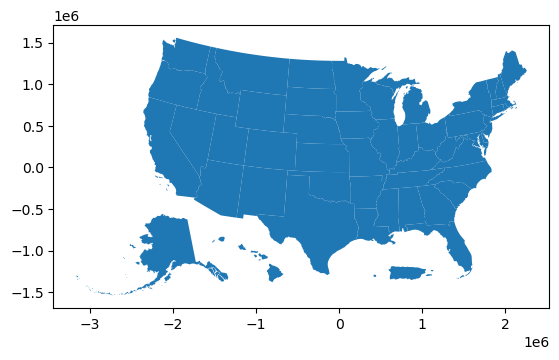

In [34]:
#| echo: false
#| code-fold: true
#| include: false

us = states(cb = True, resolution = "20m", year=2023)
us_rescaled = shift_geometry(us)
us_rescaled.plot()

In [35]:
#| echo: false
#| code-fold: true
#| include: false

# Join the data to geography
us_rescaled.head()

,STATEFP,STATENS,GEOIDFQ,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,48,01779801,0400000US48,48,TX,Texas,00,676686238592,18982083586,"POLYGON ((-998043.807 -568739.971, -997956.109..."
1,06,01779778,0400000US06,06,CA,California,00,403673296401,20291770234,"MULTIPOLYGON (((-2066284.899 -204542.622, -205..."
2,21,01779786,0400000US21,21,KY,Kentucky,00,102266598312,2384223544,"POLYGON ((571924.530 -84268.109, 577745.348 -8..."
3,13,01705317,0400000US13,13,GA,Georgia,00,149485311347,4419673221,"POLYGON ((939223.082 -230281.864, 951008.202 -..."
4,55,01779806,0400000US55,55,WI,Wisconsin,00,140292627460,29343084365,"MULTIPOLYGON (((708320.068 919586.190, 715683...."


In [36]:
#| echo: false
#| code-fold: true
#| include: false

us_rescaled_final = us_rescaled.merge(
    df4,
    left_on=["GEOID"],
    right_on=["state"],
).drop(
    columns=["state"]
)

# Convert CRS
us_rescaled_final = us_rescaled_final.to_crs("EPSG:4326")

In [37]:
#| echo: false
#| code-fold: true
#| include: false

us_rescaled_final.columns

Index(['STATEFP', 'STATENS', 'GEOIDFQ', 'GEOID', 'STUSPS', 'NAME_x', 'LSAD',
       'ALAND', 'AWATER', 'geometry', 'NAME_y', 'GEO_ID', 'MedHHInc',
       'EducTotal', 'EducBelowHighSch', 'EducHighSch', 'EducAssoc', 'EducBach',
       'TotalPop', 'TotalPop16', 'LabForTotal', 'Unemployed',
       'PopPovertyDetermined', 'PovertyPop', 'PctBach', 'PovertyRate',
       'UnemploymentRate', 'LabForParticipationRate', 'netexport', 'REALGDP',
       'life_expectancy', 'Labor_Productivity_2023', 'REALGDPpercapita'],
      dtype='object')

## 3. Exploratory Plots

### 3.1 Correlation Matrix

In [38]:
#| echo: false
#| code-fold: true
#| include: false

import matplotlib.pyplot as plt
import seaborn as sns

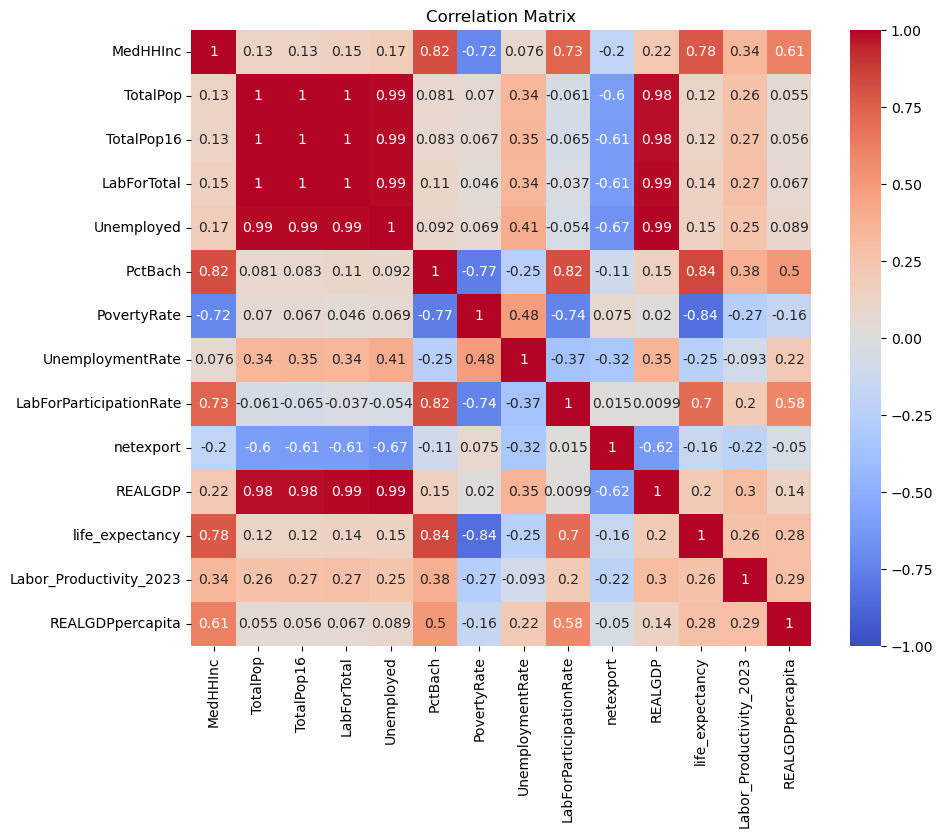

In [39]:
#| echo: false
#| code-fold: true
#| include: false

# Create a list of all variables
variables = ['MedHHInc','TotalPop', 'TotalPop16', 'LabForTotal', 'Unemployed','PctBach', 'PovertyRate', 'UnemploymentRate', 'LabForParticipationRate', 'netexport', 'REALGDP', 'life_expectancy', 'Labor_Productivity_2023', 'REALGDPpercapita']

# Create a list of selected variables for later analysis
selected_variables = ['REALGDPpercapita','life_expectancy','MedHHInc','PctBach','UnemploymentRate','LabForParticipationRate', 'Labor_Productivity_2023', 'TotalPop', 'PovertyRate', 'netexport']

# Calculate the correlation matrix
corr_matrix = us_rescaled_final[variables].corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

## 5. Predictive Modelling

In [40]:
# Models
from sklearn.ensemble import RandomForestRegressor

# Model selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Pipelines
from sklearn.pipeline import make_pipeline

# Preprocessing
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [41]:
selected_variables

['REALGDPpercapita',
 'life_expectancy',
 'MedHHInc',
 'PctBach',
 'UnemploymentRate',
 'LabForParticipationRate',
 'Labor_Productivity_2023',
 'TotalPop',
 'PovertyRate',
 'netexport']

In [42]:
usa_modelling = us_rescaled_final[selected_variables + ["geometry"]].dropna()

In [43]:
# Split the data 70/30
train_set, test_set = train_test_split(usa_modelling, test_size=0.3, random_state=42)

### 5.1 GDP per capita against variables

In [44]:
# the target labels: log of sale price
y_GDPtrain = np.log(train_set["REALGDPpercapita"])
y_GDPtest = np.log(test_set["REALGDPpercapita"])

In [45]:
# The features
GDPfeature_cols = [
    'life_expectancy',
    'MedHHInc',
    'PctBach',
    'UnemploymentRate',
    'LabForParticipationRate',
    'Labor_Productivity_2023',
    'TotalPop',
    'PovertyRate',
    'netexport',
]
X_GDPtrain = train_set[GDPfeature_cols].values
X_GDPtest = test_set[GDPfeature_cols].values

In [46]:
# Make a random forest pipeline
forest_pipeline = make_pipeline(
    StandardScaler(), RandomForestRegressor(n_estimators=100, random_state=42)
)

# Run the 10-fold cross validation
GDPscores = cross_val_score(
    forest_pipeline,
    X_GDPtrain,
    y_GDPtrain,
    cv=10,
)

# Report
print("R^2 scores = ", GDPscores)
print("Scores mean = ", GDPscores.mean())
print("Score std dev = ", GDPscores.std())

R^2 scores =  [ 0.39471629  0.56339259 -2.57903081  0.807086    0.59820521 -3.9215331
  0.04587264 -0.43517913 -3.23664019  0.60008642]
Scores mean =  -0.7163024087811765
Score std dev =  1.7148996599111843


In [47]:
# Fit on the training data
forest_pipeline.fit(X_GDPtrain, y_GDPtrain)

# What's the test score?
forest_pipeline.score(X_GDPtest, y_GDPtest)

0.5206663144853907

In [48]:
# Extract the regressor from the pipeline
forest_model = forest_pipeline["randomforestregressor"]

In [50]:
import hvplot.pandas

In [51]:
# Create the data frame of importances
importanceGDP = pd.DataFrame(
    {"Feature": GDPfeature_cols, "Importance": forest_model.feature_importances_}
).sort_values("Importance")


importanceGDP.hvplot.barh(x="Feature", y="Importance")

:Bars   [Feature]   (Importance)

### 5.2 Life Expectancy against variables

In [52]:
# the target labels: log of sale price
y_LEtrain = np.log(train_set["life_expectancy"])
y_LEtest = np.log(test_set["life_expectancy"])

In [53]:
# The features
LEfeature_cols = [
    'REALGDPpercapita',
    'MedHHInc',
    'PctBach',
    'UnemploymentRate',
    'LabForParticipationRate',
    'Labor_Productivity_2023',
    'TotalPop',
    'PovertyRate',
    'netexport',
]
X_LEtrain = train_set[LEfeature_cols].values
X_LEtest = test_set[LEfeature_cols].values

In [54]:
# Make a random forest pipeline
LEforest_pipeline = make_pipeline(
    StandardScaler(), RandomForestRegressor(n_estimators=100, random_state=42)
)

# Run the 10-fold cross validation
LEscores = cross_val_score(
    forest_pipeline,
    X_LEtrain,
    y_LEtrain,
    cv=10,
)

# Report
print("R^2 scores = ", LEscores)
print("Scores mean = ", LEscores.mean())
print("Score std dev = ", LEscores.std())

R^2 scores =  [ 6.95094617e-01  8.85361627e-01  5.46261824e-01  9.60021456e-01
  9.51224933e-01  8.97905382e-01  4.45589520e-03  3.75819263e-01
 -1.72440959e+01  7.90774467e-01]
Scores mean =  -1.1137176482882758
Score std dev =  5.384420926046987


In [55]:
# Fit on the training data
LEforest_pipeline.fit(X_LEtrain, y_LEtrain)

# What's the test score?
LEforest_pipeline.score(X_LEtest, y_LEtest)

0.7472553097289523

In [56]:
# Extract the regressor from the pipeline
LEforest_model = LEforest_pipeline["randomforestregressor"]

In [57]:
# Create the data frame of importances
importanceLE = pd.DataFrame(
    {"Feature": LEfeature_cols, "Importance": LEforest_model.feature_importances_}
).sort_values("Importance")


importanceLE.hvplot.barh(x="Feature", y="Importance")

:Bars   [Feature]   (Importance)

### 5.3 Median Household Income against variables

In [58]:
# the target labels: log of sale price
y_HHINCtrain = np.log(train_set["MedHHInc"])
y_HHINCtest = np.log(test_set["MedHHInc"])

In [59]:
# The features
HHINCfeature_cols = [
    'REALGDPpercapita',
    'life_expectancy',
    'PctBach',
    'UnemploymentRate',
    'LabForParticipationRate',
    'Labor_Productivity_2023',
    'TotalPop',
    'PovertyRate',
    'netexport',
]
X_HHINCtrain = train_set[HHINCfeature_cols].values
X_HHINCtest = test_set[HHINCfeature_cols].values

In [60]:
# Make a random forest pipeline
HHINCforest_pipeline = make_pipeline(
    StandardScaler(), RandomForestRegressor(n_estimators=100, random_state=42)
)

# Run the 10-fold cross validation
HHINCscores = cross_val_score(
    forest_pipeline,
    X_HHINCtrain,
    y_HHINCtrain,
    cv=10,
)

# Report
print("R^2 scores = ", HHINCscores)
print("Scores mean = ", HHINCscores.mean())
print("Score std dev = ", HHINCscores.std())

R^2 scores =  [ 0.87021441  0.79626634 -1.81343269  0.94035599  0.91059592  0.85661744
  0.78405563 -0.84718815  0.59170603  0.44849992]
Scores mean =  0.35376908235570953
Score std dev =  0.8808696066587679


In [61]:
# Fit on the training data
HHINCforest_pipeline.fit(X_HHINCtrain, y_HHINCtrain)

# What's the test score?
HHINCforest_pipeline.score(X_HHINCtest, y_HHINCtest)

0.8226485614034753

In [62]:
# Extract the regressor from the pipeline
HHINCforest_model = HHINCforest_pipeline["randomforestregressor"]

In [63]:
# Create the data frame of importances
importanceHHINC = pd.DataFrame(
    {"Feature": HHINCfeature_cols, "Importance": HHINCforest_model.feature_importances_}
).sort_values("Importance")


importanceHHINC.hvplot.barh(x="Feature", y="Importance")

:Bars   [Feature]   (Importance)

### 5.4 Education levels

In [64]:
# the target labels: log of sale price
y_PctBachtrain = np.log(train_set["PctBach"])
y_PctBachtest = np.log(test_set["PctBach"])

In [65]:
# The features
PctBachfeature_cols = [
    'REALGDPpercapita',
    'life_expectancy',
    'MedHHInc',
    'UnemploymentRate',
    'LabForParticipationRate',
    'Labor_Productivity_2023',
    'TotalPop',
    'PovertyRate',
    'netexport',
]
X_PctBachtrain = train_set[PctBachfeature_cols].values
X_PctBachtest = test_set[PctBachfeature_cols].values

In [66]:
# Make a random forest pipeline
PctBachforest_pipeline = make_pipeline(
    StandardScaler(), RandomForestRegressor(n_estimators=100, random_state=42)
)

# Run the 10-fold cross validation
PctBachscores = cross_val_score(
    forest_pipeline,
    X_PctBachtrain,
    y_PctBachtrain,
    cv=10,
)

# Report
print("R^2 scores = ", PctBachscores)
print("Scores mean = ", PctBachscores.mean())
print("Score std dev = ", PctBachscores.std())

R^2 scores =  [ 0.75033831  0.78667313  0.43620382  0.86629284  0.79880008  0.81455566
  0.08470399 -4.21484583 -0.12530893  0.81489821]
Scores mean =  0.1012311282401515
Score std dev =  1.4755868640441185


In [67]:
# Fit on the training data
PctBachforest_pipeline.fit(X_PctBachtrain, y_PctBachtrain)

# What's the test score?
PctBachforest_pipeline.score(X_PctBachtest, y_PctBachtest)

0.7216614717862473

In [68]:
# Extract the regressor from the pipeline
PctBachforest_model = PctBachforest_pipeline["randomforestregressor"]

In [69]:
# Create the data frame of importances
importancePctBach = pd.DataFrame(
    {"Feature": PctBachfeature_cols, "Importance": PctBachforest_model.feature_importances_}
).sort_values("Importance")


importancePctBach.hvplot.barh(x="Feature", y="Importance")

:Bars   [Feature]   (Importance)